# **NATURAL LANGUAGE PROCESSING**

# **ENVIRONMENT SETUP**

# **Install Packages**

In [1]:
import numpy
numpy.version.version

'1.21.5'

In [2]:
import gensim
gensim.__version__

'4.1.2'

In [3]:
pip install wordcloud

In [4]:
pip install autocorrect

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install spacy==3.0.5

In [6]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 13.7/13.7 MB 2.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
pip install spacytextblob

Note: you may need to restart the kernel to use updated packages.


# **Import Packages**

In [8]:
import warnings
import numpy as np 
import pandas as pd 
import os
import re
import nltk
from nltk.corpus import abc
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import *
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
from autocorrect import Speller
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models.word2vec import Text8Corpus
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **DATA PREPROCESSING**

### Dataset
* The dataset consists to Tweets by users regarding a particular airline called **United**
* It is extracted to analysis the sentiments of the tweet text
* Imported from: https://www.kaggle.com/code/shyambhu/introduction-to-sentiment-analysis

# **Data Loading**

In [9]:
data = pd.read_csv('Tweets.csv')
print('Total number of entries in the train dataset are:', len(data))
data.head()

Total number of entries in the train dataset are: 14640


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **Preliminary Analysis**

In [10]:
data.shape

(14640, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [13]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [14]:
data.isna()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


In [15]:
data = data[['tweet_id', 'text']]
data

,tweet_id,text
0,570306133677760513,@VirginAmerica What @dhepburn said.
1,570301130888122368,@VirginAmerica plus you've added commercials t...
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,569587686496825344,@AmericanAir thank you we got on a different f...
14636,569587371693355008,@AmericanAir leaving over 20 minutes Late Flig...
14637,569587242672398336,@AmericanAir Please bring American Airlines to...
14638,569587188687634433,"@AmericanAir you have my money, you change my ..."


In [16]:
text = data['text']
text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

# Sentence Tokenization

* Input: Text or corpus.
* Output: List of sentences.

In [17]:
sents1 = sent_tokenize(text[1000])
print(f'Sentence Tokenization using NLTK: \n')
print(f"{text[1000]}\n{'-' * 30} \n{sents1}")

Sentence Tokenization using NLTK: 

@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.
------------------------------ 
['@united how can you not put my bag on plane to Seattle.', 'Flight 1212.', 'Waiting  in line to talk to someone about my bag.', 'Status should matter.']


# **Word Tokenization**

* Input: Sentence or words
* Output: List of words.

In [18]:
words1 = word_tokenize(sents1[0])
print(f'Word Tokenization using NLTK: \n')
print(f"{sents1[0]}\n{'-' * 30} \n{words1}")

Word Tokenization using NLTK: 

@united how can you not put my bag on plane to Seattle.
------------------------------ 
['@', 'united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle', '.']


In [19]:
sp = spacy.load('en_core_web_sm')

In [20]:
print(f'Word Tokenization using SpaCy: \n\n{sp(text[0])}\n{"-" * 30}\n')

words2 = sp(text[0])
for word in words2:
    print(word)

Word Tokenization using SpaCy: 

@VirginAmerica What @dhepburn said.
------------------------------

@VirginAmerica
What
@dhepburn
said
.


# Stopword Removal

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
tokens1 = [word for word in words1 if not word in stopwords.words('english')] 
print(f"Stopword Removal using NLTK: \n{words1}\n{'-' * 30} \n{tokens1}")

Stopword Removal using NLTK: 
['@', 'united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle', '.']
------------------------------ 
['@', 'united', 'put', 'bag', 'plane', 'Seattle', '.']


In [23]:
spacy_stopwords = sp.Defaults.stop_words
#print(f'SpaCy Stopwords: \n{spacy_stopwords}')

In [24]:
tokens2 = [word for word in words2 if word not in spacy_stopwords] 
print(f'Stopword Removal using SpaCy: \n{words2} \n===> \n{tokens2}')

Stopword Removal using SpaCy: 
@VirginAmerica What @dhepburn said. 
===> 
[@VirginAmerica, What, @dhepburn, said, .]


# **Delimiter Removal**

In [25]:
from string import punctuation
print(f'Delimiters in English: \n{punctuation}')

Delimiters in English: 
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
tokens1 = [word for word in words1 if word not in punctuation]
print(f'Delimiter Removal: \n{words1}\n===> \n{tokens1}')

Delimiter Removal: 
['@', 'united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle', '.']
===> 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle']


# **Removal of Tags**

In [27]:
sent_with_html = "<head> <title> Natural Language Processing </title> </head>"
remove_html = re.compile('<.*?>')

print(f"Removing HTML tags: \n{sent_with_html} \n===> \n{re.sub(remove_html, '', sent_with_html).strip()}")

Removing HTML tags: 
<head> <title> Natural Language Processing </title> </head> 
===> 
Natural Language Processing


# **Spell Check**

In [28]:
spell = Speller()

print('Spelling Correction:\n')
for token in tokens1:
    print(f'{token} => {spell(token)}')


Spelling Correction:

united => united
how => how
can => can
you => you
not => not
put => put
my => my
bag => bag
on => on
plane => plane
to => to
Seattle => Seattle


In [29]:
spell = Speller()
misspelled = ['Calandar', 'neccessary', 'recieve', 'adress', 'misteak']

print('Tokens before and after Spelling Correction (Own Example):\n')
for token in misspelled:
    print(f'{token} : {spell(token)}')

Tokens before and after Spelling Correction (Own Example):

Calandar : Calendar
neccessary : necessary
recieve : receive
adress : address
misteak : mistake


# **Stemming**

In [30]:
porterStemmer = PorterStemmer()
stemWords1 = [porterStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Porter Stemmer: \n{stemWords1}')

Tokens after Stemming using Porter Stemmer: 
['unit', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'seattl']


In [31]:
snowballStemmer = SnowballStemmer('english')
stemWords2 = [snowballStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Snowball Stemmer: \n{stemWords2}')

Tokens after Stemming using Snowball Stemmer: 
['unit', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'seattl']


# **Lemmatization**

In [32]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:
wordNetLemmatizer = WordNetLemmatizer()
lemmaWords1 = [wordNetLemmatizer.lemmatize(word) for word in tokens1]

print(f'Tokens after Lemmatization using WordNet Lemmatizer: \n{tokens1}\n===> \n{lemmaWords1}')

Tokens after Lemmatization using WordNet Lemmatizer: 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle']
===> 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle']


In [34]:
lemmaWords2 = [word.lemma_ for word in tokens2]

print(f'Tokens after Lemmatization using SpaCy Lemmatization: \n{tokens2}\n===>\n{lemmaWords2}')

Tokens after Lemmatization using SpaCy Lemmatization: 
[@VirginAmerica, What, @dhepburn, said, .]
===>
['@VirginAmerica', 'what', '@dhepburn', 'say', '.']


# **FEATURE ENGINEERING**

# **Encoding**

In [35]:
animals = ['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog']

label_encoder = preprocessing.LabelEncoder()
data = pd.DataFrame({'Labels' : animals, 'Label Encoder Values' : label_encoder.fit_transform(animals)})

print("Label Encoder")
data.style.background_gradient(cmap = 'BrBG')

Label Encoder


,Labels,Label Encoder Values
0,dog,1
1,cat,0
2,mouse,3
3,dog,1
4,lion,2
5,lion,2
6,mouse,3
7,tiger,5
8,rat,4
9,dog,1


In [36]:
animals = np.array(['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog'])

ohe = preprocessing.OneHotEncoder()
result = ohe.fit_transform(animals.reshape(-1,1)).toarray()

data = pd.DataFrame(result.astype(int))
data['Labels'] = animals

print("One Hot Encoder")
data.style.background_gradient(cmap = 'Wistia')

One Hot Encoder


,0,1,2,3,4,5,Labels
0,0,1,0,0,0,0,dog
1,1,0,0,0,0,0,cat
2,0,0,0,1,0,0,mouse
3,0,1,0,0,0,0,dog
4,0,0,1,0,0,0,lion
5,0,0,1,0,0,0,lion
6,0,0,0,1,0,0,mouse
7,0,0,0,0,0,1,tiger
8,0,0,0,0,1,0,rat
9,0,1,0,0,0,0,dog


# **POS Tagger**

In [37]:
tagged_tokens1 = nltk.pos_tag(tokens1)

print(f'POS tagging using NLTK: \n{tokens1}\n===> \n{tagged_tokens1}')

POS tagging using NLTK: 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle']
===> 
[('united', 'JJ'), ('how', 'WRB'), ('can', 'MD'), ('you', 'PRP'), ('not', 'RB'), ('put', 'VB'), ('my', 'PRP$'), ('bag', 'NN'), ('on', 'IN'), ('plane', 'NN'), ('to', 'TO'), ('Seattle', 'VB')]


In [38]:
tagged_tokens2 = [word.pos_ for word in tokens2]

print('POS tagging using SpaCy: \n')
for i in range(len(tagged_tokens2)):
    print(f'{tokens2[i]} : {tagged_tokens2[i]}')

POS tagging using SpaCy: 

@VirginAmerica : PROPN
What : PRON
@dhepburn : PROPN
said : VERB
. : PUNCT


# **N-Gram**

In [39]:
n_grams1 = ngrams(tokens1, 2)
n_grams1 = [ ' '.join(grams) for grams in n_grams1]

print(f'N-Gram using NLTK (n = 2): \n{tokens1} => {n_grams1}')

N-Gram using NLTK (n = 2): 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle'] => ['united how', 'how can', 'can you', 'you not', 'not put', 'put my', 'my bag', 'bag on', 'on plane', 'plane to', 'to Seattle']


In [40]:
n_gram_finder = nltk.collocations.TrigramCollocationFinder.from_words(tokens1)

print(f'Most Common N-Gram Finder using NLTK (n = 3): \n{tokens1} => {n_gram_finder.ngram_fd.most_common(2)}')

Most Common N-Gram Finder using NLTK (n = 3): 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle'] => [(('united', 'how', 'can'), 1), (('how', 'can', 'you'), 1)]


# **Bag of Words**

In [41]:
word_count = {}

for word in tokens1:
    
    if word not in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1
        
print(f'Bag of Words: \n{tokens1} => {word_count}')

Bag of Words: 
['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'Seattle'] => {'united': 1, 'how': 1, 'can': 1, 'you': 1, 'not': 1, 'put': 1, 'my': 1, 'bag': 1, 'on': 1, 'plane': 1, 'to': 1, 'Seattle': 1}


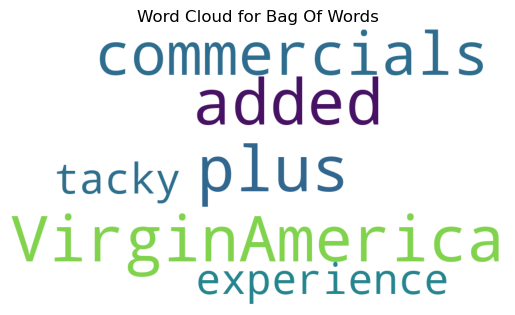

In [42]:
stopwords = set(STOPWORDS)

wc = WordCloud(width = 900, height = 500, background_color = 'white', random_state = 10).generate(text[1])

plt.title('Word Cloud for Bag Of Words')
plt.imshow(wc)
plt.axis('off')
plt.show()

# **Term Frequency**

In [43]:
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [44]:
count_vectorizer = CountVectorizer()
text_list = list(text[0:10])

tf = count_vectorizer.fit_transform(text_list)

tf_feature_names = count_vectorizer.get_feature_names_out()

print('Term Frequency of Document')
df = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)
df.style.set_caption("Term Frequency of Document")
df.style.applymap(color)

Term Frequency of Document


,30,about,added,aggressive,amazing,amp,an,and,another,arrived,away,bad,big,blast,but,co,commercials,dhepburn,didn,do,ear,early,entertainment,every,experience,faces,flight,fly,flying,for,go,good,guests,hats,have,hour,https,in,it,little,me,mean,men,missed,must,mwpg7grezp,nearly,need,now,obnoxious,only,opportunity,parody,pay,playing,plus,prime,re,really,recourse,said,seats,seriously,tacky,take,that,the,there,they,thing,this,time,to,today,too,trip,va,ve,virginamerica,vx,was,well,what,without,won,worm,would,yes,you,your
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.011111,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.011111,0.000000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.011111,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.011111,0.000000,0.000000,0.011111,0.011111,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111
4,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.011111,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# **Term Frequency - Inverse Document Frequency**

In [45]:
tfidf_vectorizer = TfidfVectorizer()
text_list = list(text[0:10])

tfidf = tfidf_vectorizer.fit_transform(text_list)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print('Term Frequency - Inverse Document Frequency of Document')
df = pd.DataFrame(tfidf.toarray(), columns = tfidf_feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)

Term Frequency - Inverse Document Frequency of Document


,30,about,added,aggressive,amazing,amp,an,and,another,arrived,away,bad,big,blast,but,co,commercials,dhepburn,didn,do,ear,early,entertainment,every,experience,faces,flight,fly,flying,for,go,good,guests,hats,have,hour,https,in,it,little,me,mean,men,missed,must,mwpg7grezp,nearly,need,now,obnoxious,only,opportunity,parody,pay,playing,plus,prime,re,really,recourse,said,seats,seriously,tacky,take,that,the,there,they,thing,this,time,to,today,too,trip,va,ve,virginamerica,vx,was,well,what,without,won,worm,would,yes,you,your
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.564630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.564630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208755,0.000000,0.000000,0.000000,0.564630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.353129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353129,0.000000,0.000000,0.300192,0.000000,0.000000,0.000000,0.000000,0.000000,0.233499,0.000000,0.000000,0.000000,0.000000,0.353129,0.130559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300192,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350779,0.000000,0.000000,0.350779,0.000000,0.000000,0.350779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231945,0.350779,0.000000,0.350779,0.000000,0.000000,0.129690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.265644,0.000000,0.265644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265644,0.000000,0.000000,0.265644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265644,0.000000,0.225821,0.000000,0.000000,0.265644,0.175651,0.265644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175651,0.265644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265644,0.000000,0.000000,0.000000,0.175651,0.000000,0.000000,0.000000,0.000000,0.000000,0.098214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.265644
4,0.000000,0.341036,0.000000,0.000000,0.000000,0.000000,0.000000,0.341036,0.000000,0.000000,0.000000,0.341036,0.401175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# **Dependency Parser**

In [46]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens1)

print(f'Dependency Parse Tree using NLTK: \n\n{sents1[0]} => \n\n{parse_tree}')

Dependency Parse Tree using NLTK: 

@united how can you not put my bag on plane to Seattle. => 

(S
  united/JJ
  how/WRB
  can/MD
  you/PRP
  not/RB
  put/VB
  my/PRP$
  (NP bag/NN)
  on/IN
  (NP plane/NN)
  to/TO
  Seattle/VB)


In [47]:
print('Dependency Parse Tree using SpaCy')

displacy.render(sp(text[1000]), style = "dep", jupyter = True, options = {"distance" : 100})

Dependency Parse Tree using SpaCy


# **Named Entity Recognition**

In [48]:
ner_chunk = nltk.ne_chunk(tagged_tokens1)

print(f'Named Entity Recognition using NLTK: \n\n{sents1[0]} =>\n')

for x in str(ner_chunk).split('\n'):
    if '/NN' in x:
        print(x)

Named Entity Recognition using NLTK: 

@united how can you not put my bag on plane to Seattle. =>

  bag/NN
  plane/NN


In [49]:
ner_sent = sp(text[7000])

print(f'Named Entity Recognition using SpaCy: \n\n{ner_sent} =>\n')

for ent in ner_sent.ents:
    print(ent.text, '-', ent.label_)

Named Entity Recognition using SpaCy: 

@JetBlue We had some major plane-wide DirectTV issues yesterday. System kept being reset by crew member. =>

yesterday - DATE


In [50]:
print('Named Entity Recognition Visualization using SpaCy')
displacy.render(ner_sent, style = 'ent', jupyter = True)

Named Entity Recognition Visualization using SpaCy


In [51]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

# **Sentiment Analysis**

In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [53]:
sia = SentimentIntensityAnalyzer()
polarity_scores1 = sia.polarity_scores(text[10])

print(f"Sentiment Analysis using NLTK: \n{text[10]} => {polarity_scores1}")

Sentiment Analysis using NLTK: 
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24 => {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.8555}


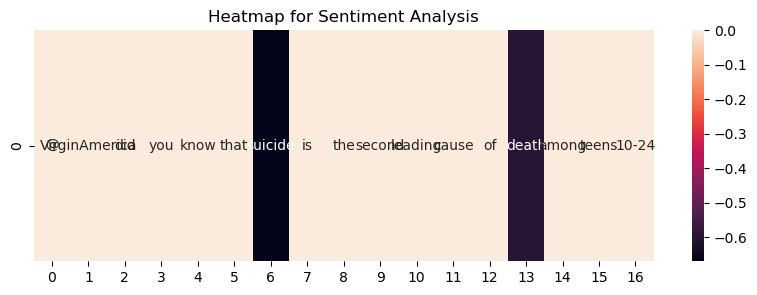

In [54]:
x = np.array([[sia.polarity_scores(word)['compound'] for word in word_tokenize(text[10])]])
annot = np.array([word_tokenize(text[10])])

plt.figure(figsize = (10, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Sentiment Analysis')
plt.show()

# **Subjectivity Detection**

In [55]:
sp.add_pipe('spacytextblob')
senti_sent = sp(text[20])

print(f"SpaCy using TextBlob: \n\n{text[20]}\n===>")
print(f"Sentiment Analysis: {senti_sent._.polarity}")
print(f"Sentiment Subjectivity: {senti_sent._.subjectivity}")
print(f"Sentiment Assessment: {senti_sent._.assessments}")


SpaCy using TextBlob: 

@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???
===>
Sentiment Analysis: 0.25625
Sentiment Subjectivity: 0.40208333333333335
Sentiment Assessment: [(['first'], 0.25, 0.3333333333333333, None), (['more'], 0.5, 0.5, None), (['other'], -0.125, 0.375, None), (['available'], 0.4, 0.4, None)]


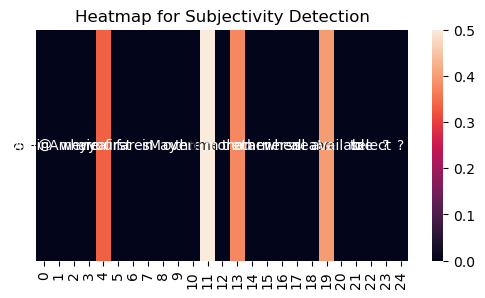

In [56]:
sub = sp(text[20])
x = np.array([[word._.subjectivity for word in sub]])
annot = np.array([word_tokenize(text[20])[ : -1]])

plt.figure(figsize = (6, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Subjectivity Detection')
plt.show()